In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
# 0(=setosa), 1(=versicolor), 2(=virginica) 
# irisデータセットをirisに格納
iris_dataset = load_iris()
# irisデータセットをDataFrameに変換
X = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
y = pd.DataFrame(iris_dataset.target, columns =['Species'])
print(type(X))
print(type(y))
# print(iris_dataset.data)
# print(iris_dataset.feature_names)
# print(iris_dataset.target)
# print(iris_dataset.target_names)
# print(iris_dataset.keys())
# データの結合
df = pd.concat([X, y], axis=1)
df
print(type(df))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [3]:
list(iris_dataset.target_names)

['setosa', 'versicolor', 'virginica']

In [4]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Species'],
      dtype='object')

**【課題1】練習のために特徴量とカテゴリを選択**<br>
①virgicolorとvirginica<br>
②sepal_length（がく片の長さ）とpetal_length（花弁の長さ）

In [6]:
print("")
print("①virgicolorとvirginica")
print("②sepal_lengthとpetal_length")
print("")
#df.query('Species==0 & Species==1')

# ①virgicolorとvirginicaを抽出
df_select = df.query('Species== [1, 2]')
# df[["sepal length (cm)","petal length (cm)","Species"]]

# ①から②sepal_lengthとpetal_lengthを抽出
df_select = df_select[["sepal length (cm)","petal length (cm)","Species"]]
df_select


①virgicolorとvirginica
②sepal_lengthとpetal_length



,sepal length (cm),petal length (cm),Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


**【問題2】データの分析**<br>
0(=setosa), 1(=versicolor), 2(=virginica) <br>
0:sepal length (cm)	1:sepal width (cm)	2:petal length (cm)	3:petal width (cm)
抜き出したデータの散布図と箱ひげ図（boxplot）、バイオリン図（violinplot）を表示<br>
③散布図<br>
④箱ひげ図（boxplot）<br>
⑤バイオリン図（violinplot）<br>


③散布図



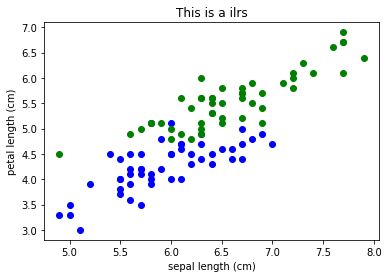

In [7]:
print("")
print("③散布図")
print("")

x_1 = df[df.Species==1].iloc[:, 0]
x_2 = df[df.Species==2].iloc[:, 0]

y_1 = df[df.Species==1].iloc[:, 2]
y_2 = df[df.Species==2].iloc[:, 2]

plt.title("This is a ilrs")
plt.xlabel("sepal length (cm)")
plt.ylabel("petal length (cm)")

plt.scatter(x_1, y_1, c='blue')
plt.scatter(x_2, y_2, c='green')


④箱ひげ図



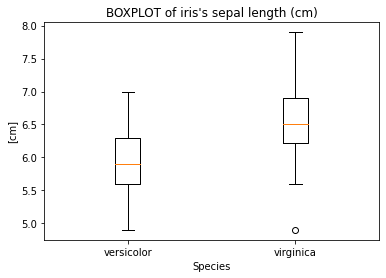

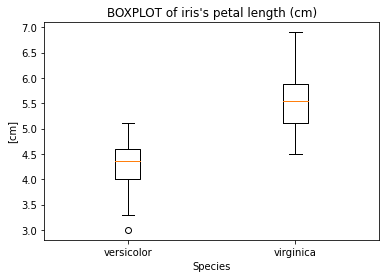

In [8]:
print("")
print("④箱ひげ図")
print("")

features = ["sepal length (cm)", "petal length (cm)"]
for feature in features:
    plt.boxplot([df[df["Species"]==1][feature], df[df["Species"]==2][feature]])
    plt.xticks([1,2], ["versicolor", "virginica"])
    plt.title("BOXPLOT of iris's {}".format(feature))
    plt.ylabel('[cm]')
    plt.xlabel('Species')
    plt.show()
    
# for i in range(2):
#     boxplot = sns.boxplot(x=df['Species'], y=df.iloc[:, i])
#     boxplot.set_xticklabels(iris.target_names)
#     plt.show()


⑤バイオリン図（violinplot）



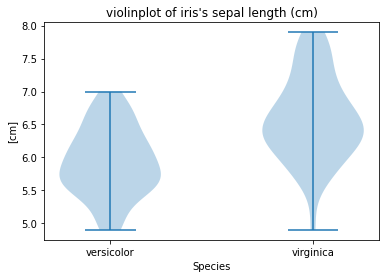

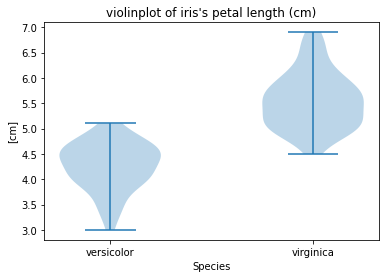

In [9]:
print("")
print("⑤バイオリン図（violinplot）")
print("")

features = ["sepal length (cm)", "petal length (cm)"]
for feature in features:
    plt.violinplot([df[df["Species"]==1][feature], df[df["Species"]==2][feature]])
    plt.xticks([1,2], ["versicolor", "virginica"])
    plt.title("violinplot of iris's {}".format(feature))
    plt.ylabel('[cm]')
    plt.xlabel('Species')
    plt.show()
# for i in range(2):
#     violinplot = sns.violinplot(x=df['Species'], y=df.iloc[:, i])
#     violinplot.set_xticklabels(iris.target_names)
#     plt.show()

**【問題3】前処理・訓練データと検証データの分割**<br>
前処理の一貫として、訓練データと検証データの分割。今回は訓練データ75%、検証データ25%として分割。<br>

In [11]:
# DataFrameをndarrayへ変換
df_select_ndarray = df_select.values
df_select_ndarray

# 特徴量（説明変数）をX_ndarray、正解（目的変数）をy_ndarrayというndarrayに格納
X_ndarray = df_select_ndarray[ : , 0:2]
y_ndarray = df_select_ndarray[ : , 2]

# X = df.iloc[:, :-1].values
# y = df.iloc[:, -1].values
# # 訓練用、テスト用　75%,25%
# # デフォルトはtest_size=0.25
X_train, X_test, y_train, y_test = train_test_split(X_ndarray, y_ndarray, test_size=0.25)



(75, 2)

**【問題4】前処理・標準化**<br>
標準化 : データの平均が0に、分散が1となるように変換する操作<br>
《注意点》<br>
検証データは学習の段階には存在しない未知のデータの代わりなので、標準化のための平均や標準偏差の計算に使ってはいけない。

In [10]:
# fit_transform:パラメータ計算とデータ変換をまとめて実行
# fit:パラメータ（平均や標準偏差 etc）計算
#　transform:パラメータをもとにデータ変換
#データの標準化
scl = StandardScaler()
#学習用データで標準化
scl.fit(X_train) 
X_train_std = scl.transform(X_train)
X_test_std = scl.transform(X_test)

**【問題5】学習と推定**<br>
* k-nnの学習。<br>
* 推定。<br>
* n_neighborsの数、デフォルトの5、および1と3を行う。<br>

In [11]:
# 5-nnの学習
# k-最近傍法のオブジェクトの宣言
nn_5 = KNeighborsClassifier() 
nn_5.fit(X_train_std, y_train)  # 学習モデル構築。引数に訓練データの特徴量と、それに対応したラベル
# 予測データの取得
y_pred_5 = nn_5.predict(X_test_std) # predictメソッドには検証データを入力
y_pred_5

array([1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2., 2., 1.,
       2., 2., 1., 1., 1., 1., 1., 2.])

In [12]:
# 3-nnの学習
# k-最近傍法のオブジェクトの宣言
nn_3 = KNeighborsClassifier(n_neighbors=3) 
nn_3.fit(X_train_std, y_train)  # 入力するのは訓練データ
# 予測データの取得
y_pred_3 = nn_3.predict(X_test_std) # predictメソッドには検証データを入力
y_pred_3

array([1., 1., 1., 1., 2., 1., 2., 2., 2., 2., 1., 1., 1., 2., 2., 2., 1.,
       2., 2., 2., 1., 1., 1., 1., 2.])

In [13]:
# 1-nnの学習
# k-最近傍法のオブジェクトの宣言
nn_1 = KNeighborsClassifier(n_neighbors=1) 
nn_1.fit(X_train_std, y_train)  # 入力するのは訓練データ
# 予測データの取得
y_pred_1 = nn_1.predict(X_test_std) # predictメソッドには検証データを入力
y_pred_1

array([1., 1., 1., 1., 2., 1., 2., 2., 2., 2., 1., 1., 1., 2., 2., 2., 1.,
       2., 2., 2., 1., 1., 1., 2., 2.])

**【問題6】評価**<br>
学習したモデルを評価する。<br>
①scikit-learnを使い4種類の指標を計算する<br>
②混同行列をscikit-learnを使い表示する<br>
③4種類の指標値の意味について簡単に調査して文章でまとめる<br>

In [14]:
print("")
print("①scikit-learnを使い4種類の指標を計算する, n_neighbors=5")
print("")
print('Accuracy（正解率）:',accuracy_score(y_test, y_pred_5))
print("")
print('Precision（適合率）:', precision_score(y_test,y_pred_5))
print("")
print('Recall（再現率）:', recall_score(y_test, y_pred_5))
print("")
print('F1 score(F値):', f1_score(y_test, y_pred_5))
print("")
print("Classification report")
print(classification_report(y_test, y_pred_5))


①scikit-learnを使い4種類の指標を計算する, n_neighbors=5

Accuracy（正解率）: 0.88

Precision（適合率）: 0.9230769230769231

Recall（再現率）: 0.8571428571428571

F1 score(F値): 0.888888888888889

Classification report
              precision    recall  f1-score   support

         1.0       0.92      0.86      0.89        14
         2.0       0.83      0.91      0.87        11

    accuracy                           0.88        25
   macro avg       0.88      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25



In [15]:
print("")
print("②混同行列をscikit-learnを使い表示する")
print("")
cmatrix = confusion_matrix(y_test,y_pred_5) # y_testとy_predは上記で定義しているものを利用します。
print(cmatrix)


②混同行列をscikit-learnを使い表示する

[[12  2]
 [ 1 10]]


**③4種類の指標値の意味について簡単に調査して文章でまとめる**

* 混同行列（Confusion matrix）<br>
二値分類（正事例と負事例の予測）の結果をまとめた表です。<br>

* Accuracy（正解率）<br>
予測結果全体がどれくらい真の値と一致しているかを表す指標<br>
Accuracy = TP+TN / TP+FP+FN+TN<br>
* Precision（適合率）<br>
適合率とは、正事例と予測したもののなかで真の値が正事例の割合を表す指標<br>
（出力した結果がどの程度正解していたのかを表す指標）<br>
＊適合率は精度とも呼ばれる<br>
* Recall（再現率）<br>
真の値が正事例のもののなかで正事例と予測した割合を表す指標。
* F値<br>
適合率と再現率はトレードオフの関係にあるので、2つの指標をまとめた指標

**【問題7】可視化**

In [16]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    a = np.min(X[:,0])-0.5 # Sepal labelの最小値-0.5
    b = np.max(X[:,0])+0.5 # Sepal labelの最大値+0.5
    c = np.min(X[:,1])-0.5 # Petal labelの最小値-0.5
    d = np.max(X[:,1])+0.5 # Petal labelの最大値+0.5
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(a, b, step), np.arange(c, d, step))
    
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

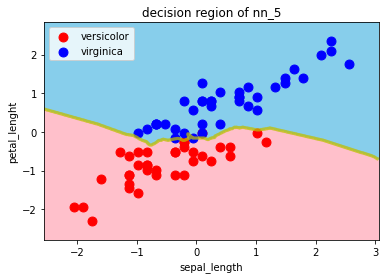

In [17]:
# 訓練データのプロット
decision_region(X_train_std, y_train, nn_5, title='decision region of nn_5', xlabel='sepal_length', ylabel='petal_lenght')

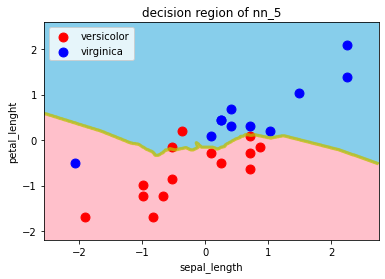

In [46]:
# 検証データのプロット
decision_region(X_test_std, y_test, nn_5, title='decision region of nn_5', xlabel='sepal_length', ylabel='petal_lenght')

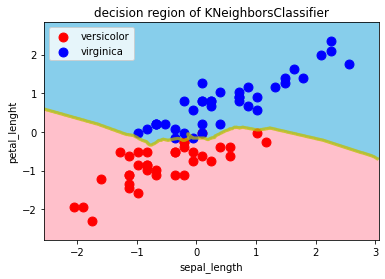

In [66]:
# 訓練データのプロット
decision_region(X_train_std, y_train, knc, title='decision region of KNeighborsClassifier', xlabel='sepal_length', ylabel='petal_lenght')

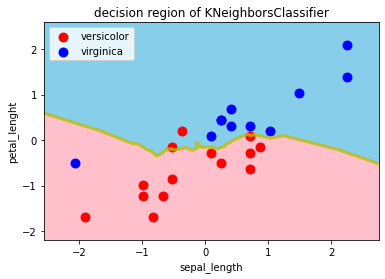

In [67]:
# 検証データのプロット
decision_region(X_test_std, y_test, knc, title='decision region of KNeighborsClassifier', xlabel='sepal_length', ylabel='petal_lenght')

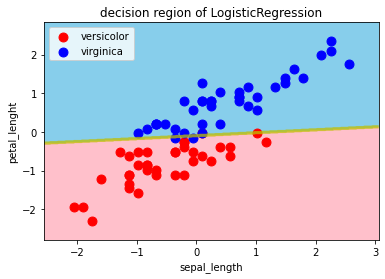

In [68]:
# 訓練データのプロット
decision_region(X_train_std, y_train, lgr, title='decision region of LogisticRegression', xlabel='sepal_length', ylabel='petal_lenght')

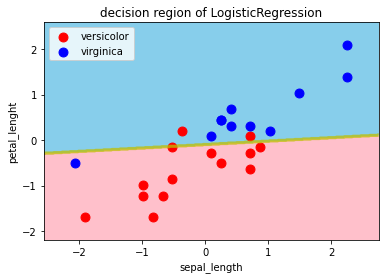

In [69]:
# 検証データのプロット
decision_region(X_test_std, y_test, lgr, title='decision region of LogisticRegression', xlabel='sepal_length', ylabel='petal_lenght')

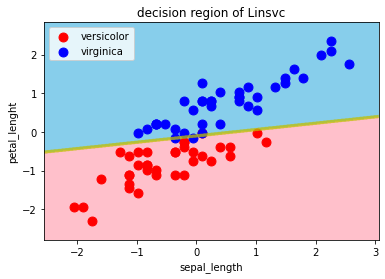

In [40]:
# 訓練データのプロット
decision_region(X_train_std, y_train, Linsvc, title='decision region of Linsvc', xlabel='sepal_length', ylabel='petal_lenght')

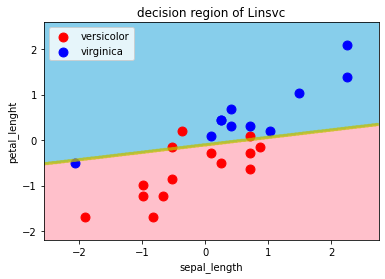

In [49]:
# 検証データのプロット
decision_region(X_test_std, y_test, Linsvc, title='decision region of Linsvc', xlabel='sepal_length', ylabel='petal_lenght')

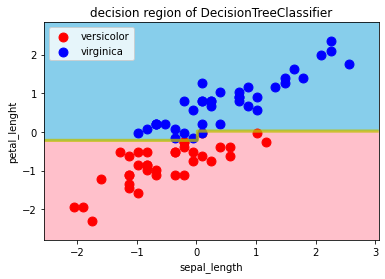

In [70]:
# 訓練データのプロット
decision_region(X_train_std, y_train, dtc, title='decision region of DecisionTreeClassifier', xlabel='sepal_length', ylabel='petal_lenght')

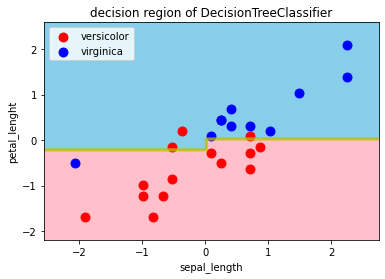

In [71]:
# 検証データのプロット
decision_region(X_test_std, y_test, dtc, title='decision region of DecisionTreeClassifier', xlabel='sepal_length', ylabel='petal_lenght')

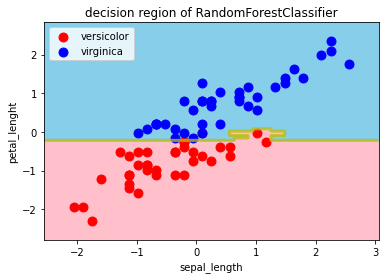

In [72]:
# 訓練データのプロット
decision_region(X_train_std, y_train, rfc, title='decision region of RandomForestClassifier', xlabel='sepal_length', ylabel='petal_lenght')

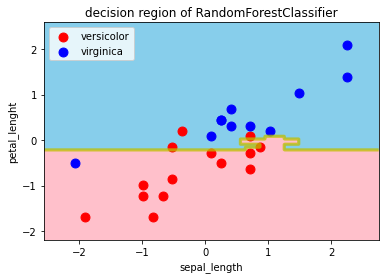

In [73]:
# 検証データのプロット
decision_region(X_test_std, y_test, rfc, title='decision region of RandomForestClassifier', xlabel='sepal_length', ylabel='petal_lenght')

In [65]:
# 5-nnの学習
# k-最近傍法のオブジェクトの宣言
nn_5 = KNeighborsClassifier() 
nn_5.fit(X_train_std, y_train)  # 学習モデル構築。引数に訓練データの特徴量と、それに対応したラベル
# 予測データの取得
y_pred_5 = nn_5.predict(X_test_std) # predictメソッドには検証データを入力
y_pred_5

print("")
print("最近傍法")
print("")
 
#最近傍法のインスタンスを作成
knc = KNeighborsClassifier()
 
#ロジスティック回帰でデータを学習
knc.fit(X_train_std, y_train)
 
#ロジスティック回帰でアヤメの種類を予測
label_pred_knc = knc.predict(X_test_std)
print(label_pred_knc)
print("")
print("最近傍法使い4種類の指標を計算する")
print("")
print('Accuracy（正解率）:',accuracy_score(y_test, label_pred_knc))
print("")
print('Precision（適合率）:', precision_score(y_test,label_pred_knc))
print("")
print('Recall（再現率）:', recall_score(y_test, label_pred_knc))
print("")
print('F1 score(F値):', f1_score(y_test, label_pred_knc))
print("")
print("Classification report")
print(classification_report(y_test, label_pred_knc))


最近傍法

[1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 1. 1. 1. 2. 2. 2. 1. 2. 2. 1. 1. 1. 1. 1.
 2.]

最近傍法使い4種類の指標を計算する

Accuracy（正解率）: 0.88

Precision（適合率）: 0.9230769230769231

Recall（再現率）: 0.8571428571428571

F1 score(F値): 0.888888888888889

Classification report
              precision    recall  f1-score   support

         1.0       0.92      0.86      0.89        14
         2.0       0.83      0.91      0.87        11

    accuracy                           0.88        25
   macro avg       0.88      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25



In [64]:
print("")
print("ロジスティック回帰")
print("")

#必要なモジュールをインポート
from sklearn.linear_model import LogisticRegression
 
#ロジスティック回帰のインスタンスを作成
lgr = LogisticRegression()
 
#ロジスティック回帰でデータを学習
lgr.fit(X_train_std, y_train)
 
#ロジスティック回帰でアヤメの種類を予測
label_pred_lgr = lgr.predict(X_test_std)
print(label_pred_lgr)
print("")
print("ロジスティック回帰を使い4種類の指標を計算する")
print("")
print('Accuracy（正解率）:',accuracy_score(y_test, label_pred_lgr))
print("")
print('Precision（適合率）:', precision_score(y_test,label_pred_lgr))
print("")
print('Recall（再現率）:', recall_score(y_test, label_pred_lgr))
print("")
print('F1 score(F値):', f1_score(y_test, label_pred_lgr))
print("")
print("Classification report")
print(classification_report(y_test, label_pred_lgr))


ロジスティック回帰

[1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 2. 2. 1. 2. 2. 1. 1. 1. 1. 2.
 2.]

ロジスティック回帰を使い4種類の指標を計算する

Accuracy（正解率）: 0.88

Precision（適合率）: 0.9230769230769231

Recall（再現率）: 0.8571428571428571

F1 score(F値): 0.888888888888889

Classification report
              precision    recall  f1-score   support

         1.0       0.92      0.86      0.89        14
         2.0       0.83      0.91      0.87        11

    accuracy                           0.88        25
   macro avg       0.88      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25



In [63]:
print("")
print("SVM")
print("")

#必要なモジュールをインポート
from sklearn import svm
 
#LinearSVMのインスタンスを作成
Linsvc = svm.LinearSVC()
 
#LinearSVMでデータを学習
Linsvc.fit(X_train_std,y_train)

#LinearSVMでアヤメの種類を予測
label_pred_Linsvc = Linsvc.predict(X_test_std)
print(label_pred_Linsvc)
print("")
print("SVMを使い4種類の指標を計算する")
print("")
print('Accuracy（正解率）:',accuracy_score(y_test, label_pred_Linsvc))
print("")
print('Precision（適合率）:', precision_score(y_test,label_pred_Linsvc))
print("")
print('Recall（再現率）:', recall_score(y_test, label_pred_Linsvc))
print("")
print('F1 score(F値):', f1_score(y_test, label_pred_Linsvc))
print("")
print("Classification report")
print(classification_report(y_test, label_pred_Linsvc))


SVM

[1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 1. 1. 1. 2. 2. 2. 1. 2. 2. 1. 1. 1. 1. 2.
 2.]

SVMを使い4種類の指標を計算する

Accuracy（正解率）: 0.84

Precision（適合率）: 0.9166666666666666

Recall（再現率）: 0.7857142857142857

F1 score(F値): 0.8461538461538461

Classification report
              precision    recall  f1-score   support

         1.0       0.92      0.79      0.85        14
         2.0       0.77      0.91      0.83        11

    accuracy                           0.84        25
   macro avg       0.84      0.85      0.84        25
weighted avg       0.85      0.84      0.84        25



In [62]:
print("")
print("決定木")
print("")
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from matplotlib.colors import ListedColormap
import graphviz

dtc = DecisionTreeClassifier()
dtc.fit(X_train_std, y_train)
label_pred_dtc = dtc.predict(X_test_std)
print(label_pred_dtc)
print("")
print("決定木を使い4種類の指標を計算する")
print("")
print('Accuracy（正解率）:',accuracy_score(y_test, label_pred_dtc))
print("")
print('Precision（適合率）:', precision_score(y_test,label_pred_dtc))
print("")
print('Recall（再現率）:', recall_score(y_test, label_pred_dtc))
print("")
print('F1 score(F値):', f1_score(y_test, label_pred_dtc))
print("")
print("Classification report")
print(classification_report(y_test, label_pred_dtc))


決定木

[1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 1. 1. 1. 2. 2. 2. 1. 2. 2. 1. 1. 1. 1. 2.
 2.]

決定木を使い4種類の指標を計算する

Accuracy（正解率）: 0.84

Precision（適合率）: 0.9166666666666666

Recall（再現率）: 0.7857142857142857

F1 score(F値): 0.8461538461538461

Classification report
              precision    recall  f1-score   support

         1.0       0.92      0.79      0.85        14
         2.0       0.77      0.91      0.83        11

    accuracy                           0.84        25
   macro avg       0.84      0.85      0.84        25
weighted avg       0.85      0.84      0.84        25



In [75]:
from sklearn.ensemble import RandomForestClassifier
print("")
print("ランダムフォレスト")
print("")

rfc = RandomForestClassifier()
rfc= rfc.fit(X_train_std, y_train)
label_pred_rfc = rfc.predict(X_test_std)
print(label_pred_rfc)
print("")
print("ランダムフォレストを使い4種類の指標を計算する")
print("")
print('Accuracy（正解率）:',accuracy_score(y_test, label_pred_rfc))
print("")
print('Precision（適合率）:', precision_score(y_test,label_pred_rfc))
print("")
print('Recall（再現率）:', recall_score(y_test, label_pred_rfc))
print("")
print('F1 score(F値):', f1_score(y_test, label_pred_rfc))
print("")
print("Classification report")
print(classification_report(y_test, label_pred_rfc))


ランダムフォレスト

[1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 1. 1. 1. 2. 2. 2. 1. 2. 2. 1. 2. 1. 1. 2.
 2.]

ランダムフォレストを使い4種類の指標を計算する

Accuracy（正解率）: 0.8

Precision（適合率）: 0.9090909090909091

Recall（再現率）: 0.7142857142857143

F1 score(F値): 0.8

Classification report
              precision    recall  f1-score   support

         1.0       0.91      0.71      0.80        14
         2.0       0.71      0.91      0.80        11

    accuracy                           0.80        25
   macro avg       0.81      0.81      0.80        25
weighted avg       0.82      0.80      0.80        25



正解率はどの手法も大きな差はない。
適合率は最近傍法、ロジスティクスのvirginicaで高い値を示した。
再現率は最近傍法、ロジスティクスのversicolorで高い値を示した。
F値は最近傍法、ロジスティクスversicolorで高い値を示した。

決定領域を確認すると、決定木とランダムフォレストにおいてversicolorをvirginicaと誤分類したものが1つ、virginicaをversicolorと分類したものが1つずつあった。最近傍法、ロジスティック回帰、SVMではversicolorをvirginicaと誤分類したのみであったた。